# PART-I (Racing Bar Chart with Matplotlib)

In this part, we will create a bar chart race with [COVID-19](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#time_series_covid_19_deaths.csv) dataset. Finally we will create a barchart race like below.

<img src="project.gif" width="750" align="left">

## Lets move on

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv('covid_19_data.csv')
covid.head(5)

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [3]:
covid.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [4]:
covid=covid[["Date","State","Country","Confirmed","Deaths","Recovered"]]

In [5]:
grouped = covid.groupby(['Country','Date'])
covid_confirmed = grouped.sum().reset_index().sort_values(['Date'],ascending=False)

In [6]:
covid_confirmed.head()

Country        Date  Confirmed  Deaths  Recovered
5089               Latvia  04/25/2020      804.0    12.0      267.0
3217               Gambia  04/25/2020       10.0     1.0        8.0
10045  West Bank and Gaza  04/25/2020      342.0     2.0       92.0
670               Bahamas  04/25/2020       78.0    11.0       15.0
1654             Cameroon  04/25/2020     1518.0    53.0      697.0

In [7]:
df = (covid_confirmed[covid_confirmed['Date'].eq("04/25/2020")].sort_values(by="Confirmed",ascending=False).head(10))

In [8]:
df

Country        Date  Confirmed   Deaths  Recovered
9610              US  04/25/2020   938154.0  53755.0   100372.0
8599           Spain  04/25/2020   223759.0  22902.0    95708.0
4524           Italy  04/25/2020   195351.0  26384.0    63120.0
3125          France  04/25/2020   161644.0  22648.0    45372.0
3370         Germany  04/25/2020   156513.0   5877.0   109800.0
9515              UK  04/25/2020   149569.0  20381.0      774.0
9429          Turkey  04/25/2020   107773.0   2706.0    25582.0
4253            Iran  04/25/2020    89328.0   5650.0    68193.0
5652  Mainland China  04/25/2020    82827.0   4632.0    77394.0
7631          Russia  04/25/2020    74588.0    681.0     6250.0

Text(0, 0.5, 'Country')

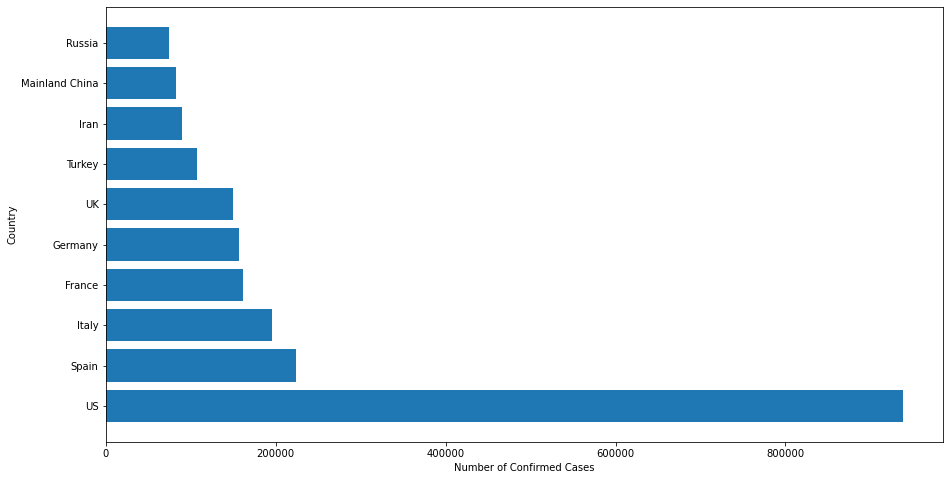

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df['Country'], df['Confirmed'])
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country')

In [10]:
df[::-1]["Country"]

7631            Russia
5652    Mainland China
4253              Iran
9429            Turkey
9515                UK
3370           Germany
3125            France
4524             Italy
8599             Spain
9610                US
Name: Country, dtype: object

Text(0, 0.5, 'Country')

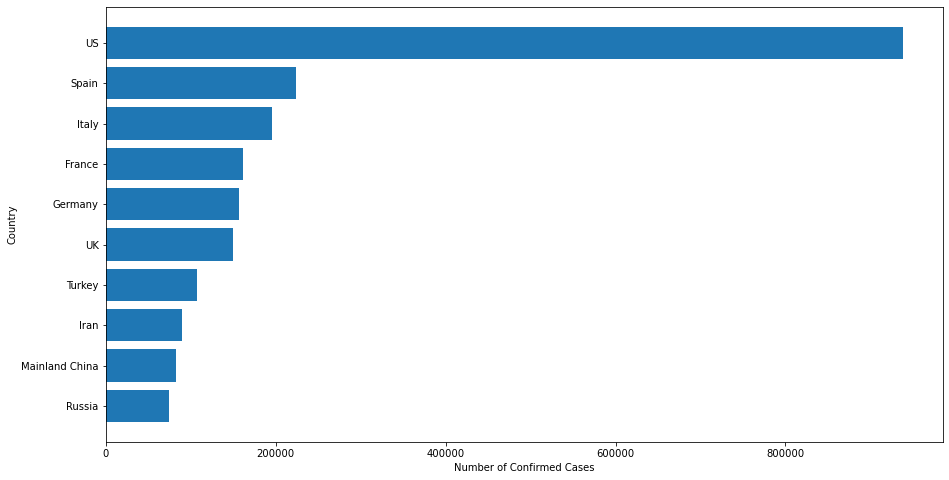

In [11]:
flipped=df[::-1]
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(flipped['Country'], flipped['Confirmed'])
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country')

In [12]:
from random import randint
import random
c_code = []
random.seed(1000)
for i in range(len(covid_confirmed.Country.unique())):
    c_code.append('#%06X' % randint(0, 0xFFFFFF))
    
colors = dict(zip(covid_confirmed.Country.unique(),c_code))

In [13]:
colors = dict(zip(covid_confirmed.Country.unique(),c_code))
colors

{'Latvia': '#DBA2EF',
 'Gambia': '#32C26D',
 'West Bank and Gaza': '#C98718',
 'Bahamas': '#B4B88D',
 'Cameroon': '#2039A8',
 'Romania': '#EF919A',
 'Mozambique': '#54DE61',
 'UK': '#DFFCCC',
 'Libya': '#42B8B1',
 'Armenia': '#719258',
 'Algeria': '#7B3DE2',
 'South Korea': '#BA7C47',
 'Benin': '#FA48AC',
 'United Arab Emirates': '#67F137',
 'Morocco': '#BBA313',
 'Liechtenstein': '#74903F',
 'Lithuania': '#EA875F',
 'Saudi Arabia': '#5DB8DF',
 'Montenegro': '#14D990',
 'South Sudan': '#F99676',
 'Guyana': '#491428',
 'Iceland': '#EC58A6',
 'Canada': '#D4DA51',
 'Turkey': '#66EACB',
 'Mongolia': '#0BED1E',
 'Switzerland': '#EFDE8A',
 'Togo': '#6FB2B3',
 'Namibia': '#5A3489',
 'Denmark': '#37BBEF',
 'Liberia': '#811CAE',
 'Netherlands': '#520E16',
 'Zambia': '#926857',
 'Kyrgyzstan': '#2F8B61',
 'Taiwan': '#008806',
 'Sweden': '#A0CCBE',
 'Georgia': '#0877C2',
 'US': '#8370EA',
 'Dominica': '#95000D',
 'New Zealand': '#3CF946',
 'India': '#637F4F',
 'Laos': '#95860A',
 'Serbia': '#C321A

Text(1, 0.4, '04/25/2020')

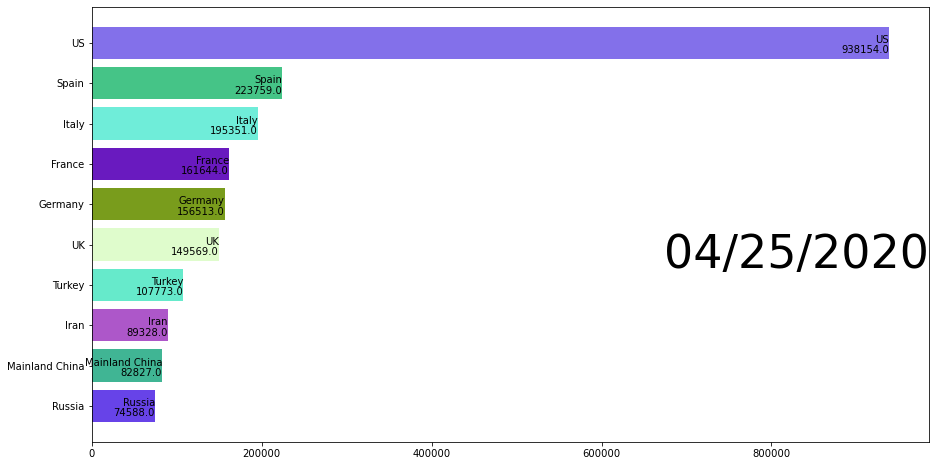

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
# pass colors values to `color=`
ax.barh(flipped['Country'], flipped['Confirmed'], color=[colors[x] for x in flipped['Country']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(flipped['Confirmed'], flipped['Country'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-0.25,     value,           ha='right')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, "04/25/2020", transform=ax.transAxes, size=46, ha='right')

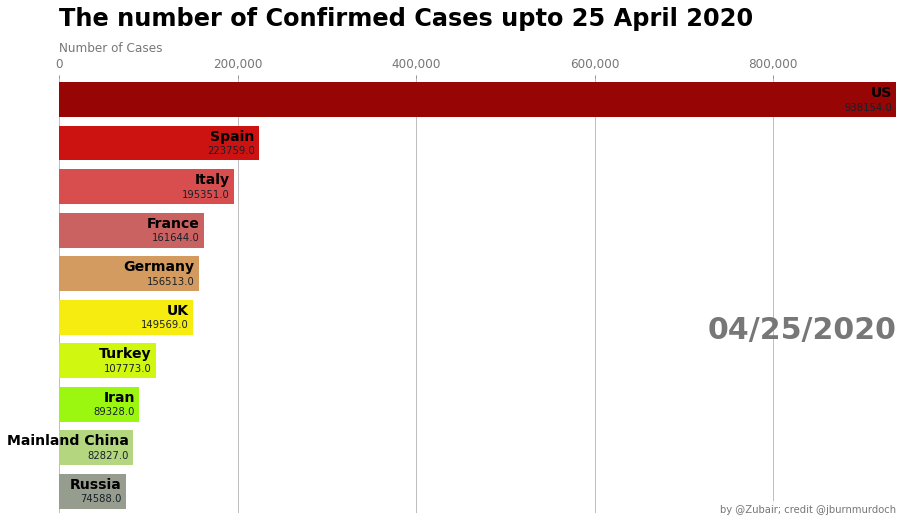

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(date,case="Confirmed"):
    dff= (covid_confirmed[covid_confirmed['Date'].eq(date)].sort_values(by=case,ascending=False).head(10))[::-1]
    ax.clear()
    ax.barh(dff['Country'], dff[case], color=["#980505","#CD1212","#D84E4E","#CB6262","#D39B5F","#F7EC10","#D0F710","#9CF710","#B4D67F","#969C8E"][::-1])
    dx = dff[case].max() / 200
    for i, (value, name) in enumerate(zip(dff[case], dff['Country'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, value, size=10, color='#17202A', ha='right', va='baseline')
        #ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=30, ha='right', weight=800)
    ax.text(0, 1.06, 'Number of Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The number of '+str(case)+' Cases upto 25 April 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @Zubair; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart('04/25/2020')

# We can try to make an animation for each state

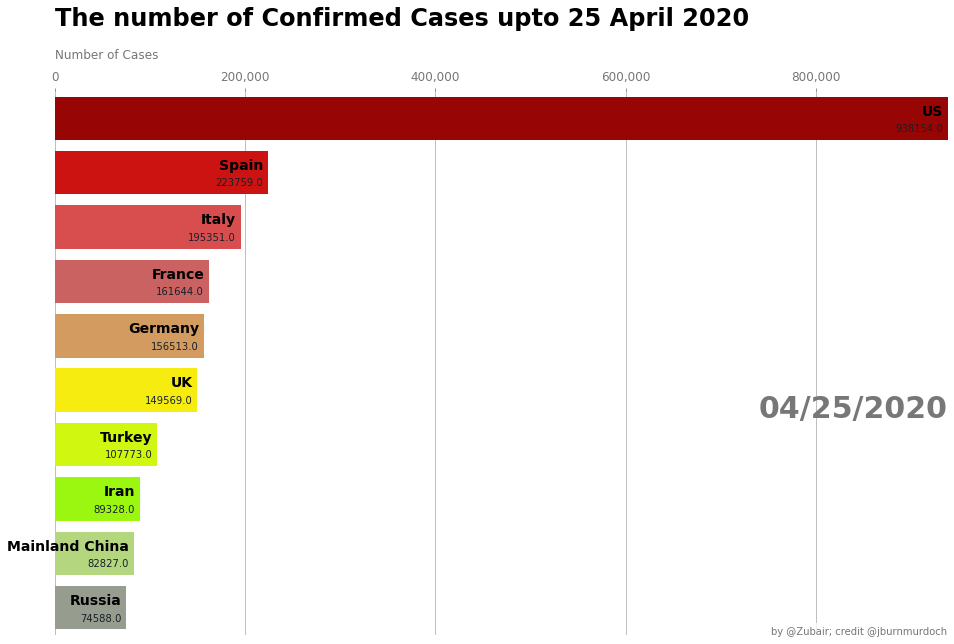

In [16]:
from matplotlib import animation as F
from IPython.display import HTML
fig,ax = plt.subplots(figsize=(16,10)) #Set figure for plot
animator = F.FuncAnimation(fig,draw_barchart,frames=covid.Date.unique(),interval=300) #Building animation
HTML(animator.to_jshtml())

#### There might be problem with rendering the animation in github. So, try to run the code remotely or in the google colab.

#                                                 PART-II


This part of code is related done for creating an interactive choropleth map of covid-19. At the end of the part, we will create an interactive choropleth like this.

<img src="covid20.gif" width="750" align="left">

In [17]:
modified_confirmed = covid_confirmed[covid_confirmed.Confirmed > 0]

<AxesSubplot:ylabel='Density'>

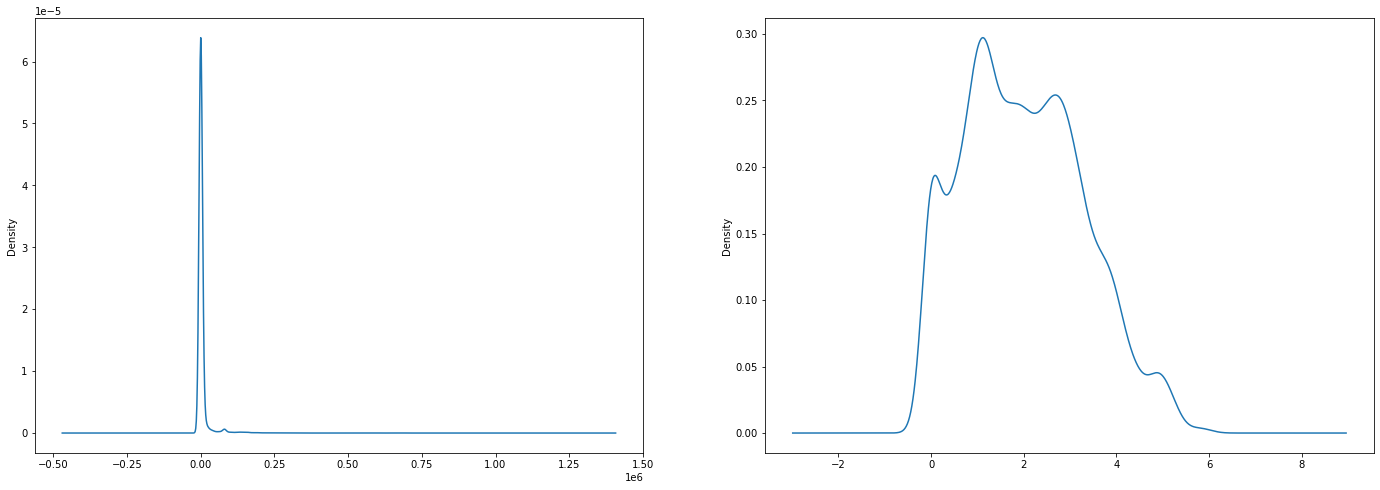

In [18]:
plt.subplots(figsize=(24,8))
plt.subplot(1,2,1)
(modified_confirmed.Confirmed).plot.kde()
plt.subplot(1,2,2)
(np.log10(modified_confirmed.Confirmed)).plot.kde()

In [19]:
modified_confirmed['Affected_Factor'] = np.log10(modified_confirmed.Confirmed)

C:\Users\teq3\AppData\Local\Temp\1/ipykernel_14840/2194036919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_confirmed['Affected_Factor'] = np.log10(modified_confirmed.Confirmed)


In [20]:
modified_confirmed.head()


Country        Date  Confirmed  Deaths  Recovered  \
5089               Latvia  04/25/2020      804.0    12.0      267.0   
3217               Gambia  04/25/2020       10.0     1.0        8.0   
10045  West Bank and Gaza  04/25/2020      342.0     2.0       92.0   
670               Bahamas  04/25/2020       78.0    11.0       15.0   
1654             Cameroon  04/25/2020     1518.0    53.0      697.0   

       Affected_Factor  
5089          2.905256  
3217          1.000000  
10045         2.534026  
670           1.892095  
1654          3.181272

In [21]:
import plotly as py
import plotly.express as px

[Note: In the github, there might be a problem with rendering animation. Try to run this code in google colab or in your own pc.]

In [22]:
fig = px.choropleth(
    modified_confirmed[::-1], #Dataframe
    locations= 'Country', #Spatial coordinates, can give Lat and Lon in separate params
    locationmode= 'country names', #Type of spatial coordinates
    color= 'Affected_Factor', #Values to be color coded
    hover_name= 'Country', #Text to be displayed in Bold upon hover
    hover_data= ['Confirmed','Recovered','Deaths'], #Extra text to be displayed in Hover tip
    animation_frame= 'Date', #Data for animation, time-series data
    color_continuous_scale=px.colors.diverging.RdYlGn[::-1],

)

fig.update_layout(
    title_text =   " COVID-19 Spread in the World upto 25 April 2020",
    title_x = 0.5,
    geo= dict(
        showframe= False,
        showcoastlines= False,
        projection_type = 'equirectangular'
    )
)